In [10]:
from grab_db import my_db
import numpy as np
import pandas as pd
import sklearn.preprocessing
from zillow_wrangle import my_train_test_split, clean_zillow, plot_variable_pairs, plot_categorical_and_continuous_vars, get_zillow_data
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from scipy.stats import pearsonr, spearmanr

In [2]:
zillow = get_zillow_data()

In [3]:
zillow

,Unnamed: 0,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
0,0,0.0,0.0,NaN,27516.0,NaN,NaN,6037.0
1,1,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
2,2,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
3,3,0.0,0.0,NaN,2108.0,NaN,174.21,6037.0
4,4,2.0,4.0,3633.0,296425.0,2005.0,6941.39,6037.0
...,...,...,...,...,...,...,...,...
2152858,2152858,3.0,4.0,2262.0,960756.0,2015.0,13494.52,6059.0
2152859,2152859,4.5,4.0,3127.0,536061.0,2014.0,6244.16,6059.0
2152860,2152860,0.0,0.0,NaN,208057.0,NaN,5783.88,6059.0
2152861,2152861,2.5,3.0,1974.0,424353.0,2015.0,5302.70,6059.0


In [4]:
zillow = clean_zillow(zillow)

/Users/zacharystufflebeme/codeup-data-science/regression-exercises-MIRZ/regression-exercises-MIRZ/zillow_wrangle.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.yearbuilt[df.bathroomcnt == 0.0] = df.yearbuilt[df.bathroomcnt == 0].fillna(0)
/Users/zacharystufflebeme/codeup-data-science/regression-exercises-MIRZ/regression-exercises-MIRZ/zillow_wrangle.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.calculatedfinishedsquarefeet[df.yearbuilt == 0.0] = df.calculatedfinishedsquarefeet[df.yearbuilt == 0.0].replace(np.nan,0)


In [5]:
zillow

,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,fips
0,2.0,4.0,3633.0,296425.0,2005.0,6037.0
1,4.0,3.0,1620.0,847770.0,2011.0,6037.0
2,2.0,3.0,2077.0,646760.0,1926.0,6037.0
3,0.0,0.0,1200.0,5328.0,1972.0,6037.0
4,0.0,0.0,171.0,6920.0,1973.0,6037.0
...,...,...,...,...,...,...
2142798,4.0,4.0,4375.0,422400.0,2015.0,6037.0
2142799,3.0,4.0,2262.0,960756.0,2015.0,6059.0
2142800,4.5,4.0,3127.0,536061.0,2014.0,6059.0
2142801,2.5,3.0,1974.0,424353.0,2015.0,6059.0


In [6]:
train, validate, test = my_train_test_split(zillow)

In [ ]:
plot_variable_pairs(train)

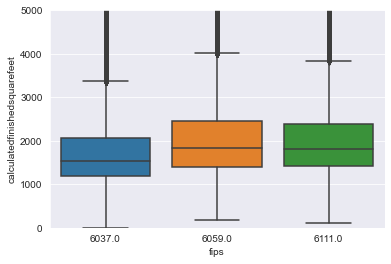

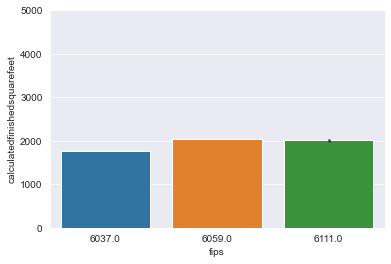

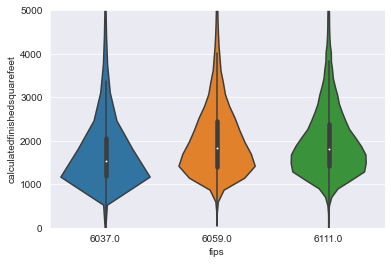

(<AxesSubplot:xlabel='fips', ylabel='calculatedfinishedsquarefeet'>,
 (0.0, 5000.0),
 None,
 <AxesSubplot:xlabel='fips', ylabel='calculatedfinishedsquarefeet'>,
 (0.0, 5000.0),
 None,
 <AxesSubplot:xlabel='fips', ylabel='calculatedfinishedsquarefeet'>,
 (0.0, 5000.0),
 None)

In [7]:
plot_categorical_and_continuous_vars(train,'fips','calculatedfinishedsquarefeet')

In [28]:
max(train.calculatedfinishedsquarefeet[train.fips == 6059.0])

531118.0

In [8]:
# Create the correlation matrix for all features.

zillow_corr = train.corr()
zillow_corr


,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,fips
bathroomcnt,1.000000,0.643361,0.831517,0.502936,0.505958,0.097851
bedroomcnt,0.643361,1.000000,0.603474,0.256840,0.373933,0.136056
calculatedfinishedsquarefeet,0.831517,0.603474,1.000000,0.612125,0.434182,0.095619
taxvaluedollarcnt,0.502936,0.256840,0.612125,1.000000,0.189726,0.017623
yearbuilt,0.505958,0.373933,0.434182,0.189726,1.000000,0.298620
fips,0.097851,0.136056,0.095619,0.017623,0.298620,1.000000


## Hypothesis Time:

-Hnull - there is no correlation between calculated finished square feet and fips
-Halt - There is a correlation between calculated finished square feet and fips


In [13]:
# Use a scipy stats function spearmanr to calculate the correlation coefficient and the p-value.

r, p_value = spearmanr(train.fips, train.calculatedfinishedsquarefeet)
print(f'Correlation Coefficient: {r}\nP-value: {p_value}')


Correlation Coefficient: 0.1855614508196602
P-value: 0.0


Since the p_val is less than our default alpha of .05 we can reject the null hypthesis that the two features are not correlated.

We used pearsonr because fips was not normally distributed